# Tuning k-NN 

In [30]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('final_model_for_tuning.csv', index_col = 0)
X_Pred = pd.read_csv('data_for_prediction.csv', index_col = 0)

/Users/bigyanbhandari/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
X.head()

,ABBR,LOCALE,TOTAL STUDENTS,ASIAN,HISPANIC,BLACK,WHITE
0,1,101,-0.992013,-0.307686,-0.372211,-0.424484,-0.817053
1,1,102,-1.156632,-0.321053,-0.476906,-0.525924,-0.920000
2,2,102,-1.073195,-0.321053,-0.468181,-0.525924,-0.803769
3,3,102,0.275329,-0.294320,-0.468181,0.476543,0.604290
4,4,101,0.597802,-0.267587,0.029117,0.643621,0.604290


In [4]:
X_Pred.head()

,ABBR,LOCALE,TOTAL STUDENTS,AMERICAN INDIAN,ASIAN,HISPANIC,BLACK,WHITE
0,50,110,-0.818646,0.635619,-0.248729,-0.494610,-0.526397,-0.569339
1,39,111,-1.126164,-0.198263,-0.328739,-0.562080,-0.526397,-0.867948
2,39,111,-0.318654,-0.105610,-0.122998,-0.272354,-0.316468,-0.069169
3,45,114,0.075146,-0.198263,0.437077,-0.454921,-0.208117,0.445931
4,41,111,-1.006697,-0.198263,-0.328739,-0.335856,-0.431590,-0.927670


In [5]:
X_Pred.drop(columns = ['AMERICAN INDIAN'], inplace = True)

In [6]:
Y_HI = pd.read_csv('high-poverty-label.csv')
Y_PRED_HI = pd.read_csv('High-label-20.csv', index_col = 0)

In [7]:
Y_PRED_HI.head()

,HI-LABEL-19-20
0,1
1,0
2,1
3,0
4,1


In [8]:
Y_HI = Y_HI['HI-LABEL']
Y_PRED_HI = Y_PRED_HI['HI-LABEL-19-20']

In [9]:
Y_STRICT = pd.read_csv('strict-poverty-label.csv')
Y_PRED_STRICT = pd.read_csv('Strict-label-20.csv', index_col = 0)

In [10]:
Y_STRICT = Y_STRICT['STRICT-LABEL']
Y_PRED_STRICT = Y_PRED_STRICT['STRICT-LABEL-19-20']

In [11]:
grid_params = { 'n_neighbors' : [10, 20, 30, 40, 50],
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan']
}

# Predict HIGH-poverty

In [12]:
model = KNeighborsClassifier( n_neighbors = 25, metric = 'minkowski', weights = 'uniform')

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, Y_HI, stratify = Y_HI, random_state = 10)

In [14]:
model.fit( X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [15]:
hi_predict = model.predict( X_Pred)

In [16]:
print( accuracy_score( hi_predict, Y_PRED_HI))

0.8447079407487971


In [17]:
print( confusion_matrix(hi_predict, Y_PRED_HI))

[[13514  8967]
 [ 4169 57939]]


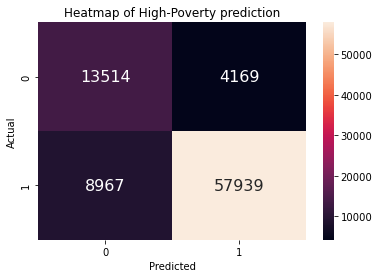

In [41]:
df_cm = pd.DataFrame(confusion_matrix(Y_PRED_HI, hi_predict), range(2), range(2))
# plt.figure(figsize=(10,7))
#sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = 'g') # font size
plt.title( 'Heatmap of High-Poverty prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [44]:
from sklearn.metrics import classification_report


In [45]:
matrix = classification_report(Y_PRED_HI,hi_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.87      0.90     66906
           0       0.60      0.76      0.67     17683

    accuracy                           0.84     84589
   macro avg       0.77      0.82      0.79     84589
weighted avg       0.86      0.84      0.85     84589



# Model on Y_Strict

In [18]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split( X, Y_STRICT, stratify = Y_STRICT, random_state = 10)

In [19]:
model_2 = KNeighborsClassifier( n_neighbors = 25, metric = 'minkowski', weights = 'uniform')

In [20]:
model_2.fit(X_s_train, y_s_train)

KNeighborsClassifier(n_neighbors=25)

In [21]:
strict_predict = model_2.predict( X_Pred)

In [22]:
print( accuracy_score( strict_predict, Y_PRED_STRICT))

0.8007424133161523


In [23]:
print( confusion_matrix( strict_predict, Y_PRED_STRICT))

[[25286 12897]
 [ 3958 42448]]


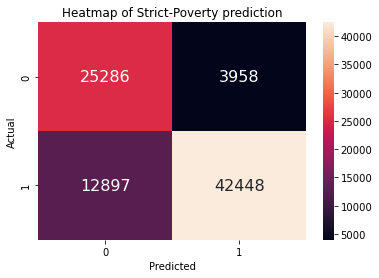

In [43]:
df_cm = pd.DataFrame(confusion_matrix(Y_PRED_STRICT, strict_predict), range(2), range(2))
# plt.figure(figsize=(10,7))
#sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = 'g') # font size
plt.title( 'Heatmap of Strict-Poverty prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [46]:
matrix = classification_report(Y_PRED_STRICT,strict_predict,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.77      0.83     55345
           0       0.66      0.86      0.75     29244

    accuracy                           0.80     84589
   macro avg       0.79      0.82      0.79     84589
weighted avg       0.83      0.80      0.81     84589

